In [2]:
import numpy as np
from scipy.spatial.distance import cosine

np.__version__

'1.22.4'

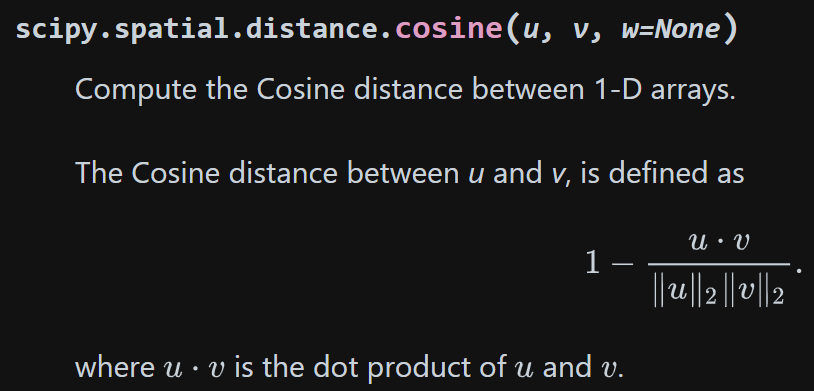

In [26]:
num_cols = 1000

arr1 = np.random.rand(128, num_cols)
arr2 = np.random.rand(128, num_cols)

In [27]:
%%timeit
cosine_similarity = np.zeros(num_cols)

for i in range(len(cosine_similarity)):
    arr1_vals = arr1[:, i]
    norm1_arr = arr1_vals / np.linalg.norm(arr1_vals)

    arr2_vals = arr2[:, i]
    norm2_arr = arr2_vals / np.linalg.norm(arr2_vals)

    dot_prod = np.dot(norm1_arr, norm2_arr)
    cosine_similarity[i] = 1 - dot_prod

# cosine_similarity

21.5 ms ± 4.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
arr1.shape

(128, 30)

In [28]:
%%timeit
norm1_arr = arr1 / np.linalg.norm(arr1, axis=0, keepdims=True)
norm2_arr = arr2 / np.linalg.norm(arr2, axis=0, keepdims=True)

dot_prods = np.sum(norm1_arr * norm2_arr, axis=0)
cosine_similarity = 1 - dot_prods
# cosine_similarity

936 µs ± 164 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
# %%timeit
# np.array([cosine(arr1[:, i], arr2[:, i]) for i in range(30)])

1.3 ms ± 413 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
